In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [3]:
dev = qml.device("default.qubit", wires=3, shots=100)

(<Figure size 800x400 with 1 Axes>, <Axes: >)

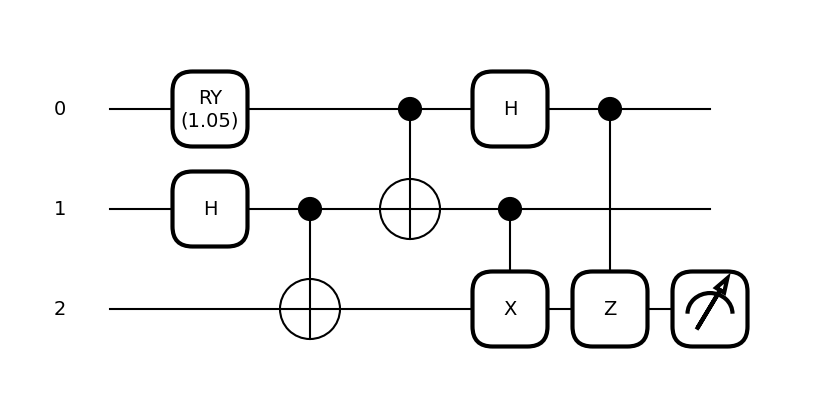

In [4]:
@qml.qnode(dev)
def circuit(rotation):
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])
    qml.RY(rotation, wires=0)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    
    c0 = qml.measure(wires=0)
    c1 = qml.measure(wires=1)
    
    qml.cond(c1, qml.PauliX)(wires=2)
    qml.cond(c0, qml.PauliZ)(wires=2)
    return qml.counts(qml.PauliZ(2))

qml.draw_mpl(circuit, decimals=2, expansion_strategy='device')(np.pi/3)

<module 'matplotlib.pyplot' from '/home/korbinian/miniconda3/envs/pennylane/lib/python3.11/site-packages/matplotlib/pyplot.py'>

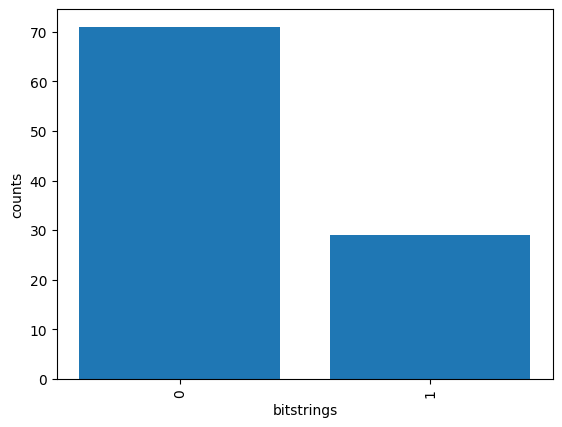

In [5]:
def counts_to_histogram(counts):
    h_data = dict()
    for k,v in reversed(counts.items()):
        h_data[str(k).replace('-1','_').replace('1','0').replace('_','1')] = v
    plt.bar(h_data.keys(), h_data.values());
    plt.xlabel('bitstrings');
    plt.ylabel('counts');
    plt.xticks(rotation=90);
    return plt

counts_to_histogram(circuit(np.pi/3))